In [39]:
import fastf1 as ff1


In [161]:
#race = ff1.get_session(2021, 'Brazil', '')


quali = ff1.get_session(2021, 'Turkey', 'Q')

In [160]:
quali

In [162]:
ff1.Cache.enable_cache('cache')

In [163]:
laps = quali.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Turkish Grand Prix - Qualifying [v2.1.12]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['18', '99', '7', '5', '9', '3', '10', '31', '16', '6', '33', '22', '47', '77', '11', '4', '55', '14', '63', '44']


In [44]:
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [153]:
laps

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:19:42.333000,3,NaT,1,1,0 days 00:18:10.839000,NaT,NaT,0 days 00:00:49.553000,0 days 00:00:19.969000,...,315.0,SOFT,1.0,True,0 days 00:18:10.839000,McLaren,RIC,1,False,2021-11-12 19:03:10.848
1,0 days 00:20:52.007000,3,0 days 00:01:09.674000,2,1,NaT,NaT,0 days 00:00:17.988000,0 days 00:00:35.404000,0 days 00:00:16.282000,...,274.0,SOFT,2.0,True,0 days 00:19:42.333000,McLaren,RIC,1,True,2021-11-12 19:04:42.342
2,0 days 00:22:32.617000,3,0 days 00:01:40.610000,3,1,NaT,NaT,0 days 00:00:27.817000,0 days 00:00:54.938000,0 days 00:00:17.855000,...,314.0,SOFT,3.0,True,0 days 00:20:52.007000,McLaren,RIC,1,True,2021-11-12 19:05:52.016
3,0 days 00:23:48.713000,3,0 days 00:01:16.096000,4,2,NaT,0 days 00:23:45.604000,0 days 00:00:17.961000,0 days 00:00:35.501000,0 days 00:00:22.634000,...,NaN,SOFT,1.0,True,0 days 00:22:32.617000,McLaren,RIC,1,False,2021-11-12 19:07:32.626
4,0 days 00:26:39.889000,3,NaT,5,3,0 days 00:25:19.110000,0 days 00:26:36.878000,NaT,0 days 00:00:39.997000,0 days 00:00:22.666000,...,NaN,SOFT,1.0,True,0 days 00:23:48.713000,McLaren,RIC,1,False,2021-11-12 19:08:48.722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0 days 00:45:57.066000,99,NaT,10,4,0 days 00:44:18.606000,NaT,NaT,0 days 00:01:00.500000,0 days 00:00:18.092000,...,326.0,SOFT,5.0,False,0 days 00:35:01.377000,Alfa Romeo,GIO,1,False,2021-11-12 19:20:01.386
319,0 days 00:47:07.293000,99,0 days 00:01:10.227000,11,4,NaT,NaT,0 days 00:00:17.946000,0 days 00:00:35.903000,0 days 00:00:16.378000,...,294.0,SOFT,6.0,False,0 days 00:45:57.066000,Alfa Romeo,GIO,1,True,2021-11-12 19:30:57.075
320,0 days 00:48:33.045000,99,0 days 00:01:25.752000,12,5,NaT,0 days 00:48:30.081000,0 days 00:00:22.149000,0 days 00:00:40.349000,0 days 00:00:23.254000,...,NaN,SOFT,4.0,False,0 days 00:47:07.293000,Alfa Romeo,GIO,1,False,2021-11-12 19:32:07.302
321,0 days 00:54:40.416000,99,NaT,13,5,0 days 00:52:53.908000,NaT,NaT,0 days 00:00:59.882000,0 days 00:00:19.233000,...,328.0,SOFT,2.0,True,0 days 00:48:33.045000,Alfa Romeo,GIO,1,False,2021-11-12 19:33:33.054


In [152]:
plotting.setup_mpl()


In [47]:
# Select the laps from Hamilton and Verstappen
laps_ver = laps.pick_driver('VER')
laps_ham = laps.pick_driver('HAM')

# Get the telemetry data from their fastest lap
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_ham = laps_ham.pick_fastest().get_telemetry().add_distance()

# Since the telemetry data does not have a variable that indicates the driver, 
# we need to create that column
fastest_ver['Driver'] = 'VER'
fastest_ham['Driver'] = 'HAM'

# Merge both lap telemetries so we have everything in one DataFrame
telemetry = fastest_ver.append(fastest_ham)

In [48]:
laps_ver

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
19,0 days 00:17:13.438000,33,NaT,1,1,0 days 00:15:17.880000,NaT,NaT,0 days 00:00:42.860000,0 days 00:00:45.153000,...,249.0,SOFT,1.0,True,0 days 00:15:17.880000,Red Bull,VER,1,False,2021-12-11 13:00:18.064
20,0 days 00:18:37.118000,33,0 days 00:01:23.680000,2,1,NaT,NaT,0 days 00:00:17.041000,0 days 00:00:36.245000,0 days 00:00:30.394000,...,325.0,SOFT,2.0,True,0 days 00:17:13.438000,Red Bull,VER,1,True,2021-12-11 13:02:13.622
21,0 days 00:20:56.346000,33,0 days 00:02:19.228000,3,1,NaT,NaT,0 days 00:00:28.711000,0 days 00:01:00.469000,0 days 00:00:50.048000,...,188.0,SOFT,3.0,True,0 days 00:18:37.118000,Red Bull,VER,1,True,2021-12-11 13:03:37.302
22,0 days 00:22:53.118000,33,0 days 00:01:56.772000,4,1,NaT,NaT,0 days 00:00:25.483000,0 days 00:00:50.767000,0 days 00:00:40.522000,...,231.0,SOFT,4.0,True,0 days 00:20:56.346000,Red Bull,VER,1,True,2021-12-11 13:05:56.530
23,0 days 00:24:16.440000,33,0 days 00:01:23.322000,5,1,NaT,NaT,0 days 00:00:17.078000,0 days 00:00:36.043000,0 days 00:00:30.201000,...,321.0,SOFT,5.0,True,0 days 00:22:53.118000,Red Bull,VER,1,True,2021-12-11 13:07:53.302
24,0 days 00:26:01.548000,33,0 days 00:01:45.108000,6,2,NaT,0 days 00:26:00.548000,0 days 00:00:18.624000,0 days 00:00:43.927000,0 days 00:00:42.557000,...,262.0,SOFT,1.0,True,0 days 00:24:16.440000,Red Bull,VER,1,False,2021-12-11 13:09:16.624
25,0 days 00:44:59.616000,33,NaT,7,2,0 days 00:43:16.296000,NaT,NaT,0 days 00:00:41.847000,0 days 00:00:39.790000,...,261.0,MEDIUM,2.0,True,0 days 00:26:01.548000,Red Bull,VER,52,False,2021-12-11 13:11:01.732
26,0 days 00:46:22.805000,33,0 days 00:01:23.189000,8,2,NaT,NaT,0 days 00:00:16.964000,0 days 00:00:35.919000,0 days 00:00:30.306000,...,327.0,MEDIUM,3.0,True,0 days 00:44:59.616000,Red Bull,VER,1,True,2021-12-11 13:29:59.800
27,0 days 00:48:54.311000,33,NaT,9,2,NaT,NaT,0 days 00:00:28.572000,0 days 00:01:08.014000,0 days 00:00:54.892000,...,178.0,MEDIUM,4.0,True,0 days 00:46:22.805000,Red Bull,VER,1,False,2021-12-11 13:31:22.989
28,0 days 00:50:37.467000,33,0 days 00:01:43.156000,10,3,NaT,0 days 00:50:36.302000,0 days 00:00:20.854000,0 days 00:00:39.568000,0 days 00:00:42.734000,...,267.0,MEDIUM,1.0,True,0 days 00:48:54.311000,Red Bull,VER,1,False,2021-12-11 13:33:54.495


In [49]:
# We want 25 mini-sectors (this can be adjusted up and down)
num_minisectors = 25

# Grab the maximum value of distance that is known in the telemetry
total_distance = total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors 
minisector_length = total_distance / num_minisectors

In [50]:
minisector_length

209.14485555555567

In [51]:
total_distance

5228.6213888888915

In [52]:
# Initiate minisector variable, with 0 (meters) as a starting point.
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [53]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [54]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

In [55]:
average_speed

,Minisector,Driver,Speed
0,1,HAM,260.615385
1,1,VER,260.461538
2,2,HAM,233.035714
3,2,VER,236.482759
4,3,HAM,219.600000
5,3,VER,216.766667
6,4,HAM,265.080000
7,4,VER,265.080000
8,5,HAM,279.173913
9,5,VER,279.869565


In [56]:

# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

In [57]:
fastest_driver

,Minisector,Fastest_driver
0,1,HAM
3,2,VER
4,3,HAM
6,4,HAM
9,5,VER
11,6,VER
12,7,HAM
14,8,HAM
17,9,VER
19,10,VER


In [58]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'HAM', 'Fastest_driver_int'] = 2

In [84]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)


In [145]:

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('winter', 2)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

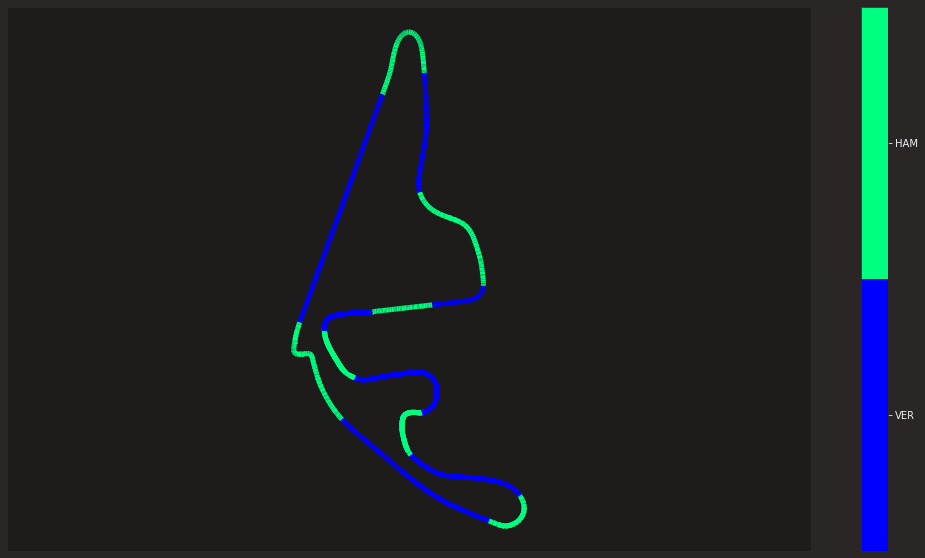

In [146]:
plt.rcParams['figure.figsize'] = [18, 10]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,4))
cbar.set_ticks(np.arange(1.5, 3.5))
label = ["VER", "HAM"]


#cbar.set_xticklabels(['zero','two','four','six'])
cbar.set_ticklabels(label)

